# 卷积神经网络
卷积神经网络可分两个大部分:
- 图像的特征提取
    
    通过卷积层和池化层提取图像特征
    
- 完全连接神经网络
    
    包含平坦层,隐藏层,输出层,所组成的类神经网络.
    
## 卷积层
   
   卷积层的意义是将原本一个图像经过卷积运算产生多个图像.
   
   **卷积运算的运算方式:**
   1. 先以随机的方式产生filter weight矩阵(filter weight矩阵相当于一个滤镜的效果)
   2. 要转换的图像从左到右,自上而下,按序选取与filter weight矩阵相同shape的矩阵
   3. 图像选取矩阵与filter weight矩阵的乘积计算得出一个标量数据,作为新图像的元素.
   
## 池化层

   池化层就是对卷积运算产生的新图像进行下采样(缩减采样)
    
   **最大池化层的运算方式:**
   
   池化层矩阵里最大的元素作为新图像的元素.
   
   下采样的好处:
   1. 减少需处理的数据点:减少计算量
   2. 让图像位置的差异变小:通过减小图像大小,让数字的位置差异变小
   3. 参数的数量和计算量下降:这在一定程度上也控制了过拟合现象

## 数据预处理

In [34]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

In [20]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

In [2]:
#读取MNIST数据
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
#将feature转换为四维矩阵
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
'''
filters: 建立16个滤镜
kernel_size:表示每个滤镜的大小
padding:设置为same表示卷积运算产生的图像大小与原图像大小不变
input_shape:第一,二维代表输入的图像形状为28x28,第三维:因为是单色灰度图像,所以最后维度值为1
'''
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

## 建立神经网络

In [13]:
#建立平坦层,将多维数据转成一维数据
model.add(Flatten())

In [14]:
#建立隐藏层
model.add(Dense(128, activation='relu'))
#建立dropout层
model.add(Dropout(0.5))
#建立输出层
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## 进行训练

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2,
                         epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
132s - loss: 0.4875 - acc: 0.8474 - val_loss: 0.0970 - val_acc: 0.9715
Epoch 2/10
108s - loss: 0.1402 - acc: 0.9582 - val_loss: 0.0630 - val_acc: 0.9805
Epoch 3/10
126s - loss: 0.1023 - acc: 0.9692 - val_loss: 0.0510 - val_acc: 0.9840
Epoch 4/10
124s - loss: 0.0846 - acc: 0.9751 - val_loss: 0.0464 - val_acc: 0.9863
Epoch 5/10
95s - loss: 0.0715 - acc: 0.9784 - val_loss: 0.0395 - val_acc: 0.9873
Epoch 6/10
102s - loss: 0.0646 - acc: 0.9805 - val_loss: 0.0388 - val_acc: 0.9889
Epoch 7/10
99s - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0408 - val_acc: 0.9883
Epoch 8/10
107s - loss: 0.0508 - acc: 0.9840 - val_loss: 0.0342 - val_acc: 0.9902
Epoch 9/10
107s - loss: 0.0451 - acc: 0.9866 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 10/10
98s - loss: 0.0420 - acc: 0.9873 - val_loss: 0.0337 - val_acc: 0.9903


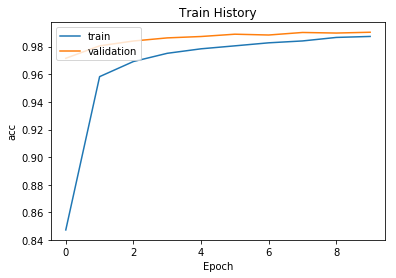

In [24]:
show_train_history(train_history,'acc','val_acc')

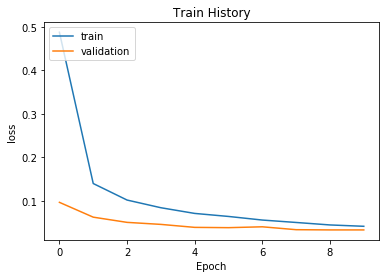

In [25]:
show_train_history(train_history, 'loss','val_loss')

## 评估模型准确率

In [26]:
scores = model.evaluate(x_Test4D, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 7s     


0.99080000000000001

## 进行预测

In [27]:
prediction = model.predict_classes(x_Test4D)

 9952/10000 [============================>.] - ETA: 0s

In [29]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

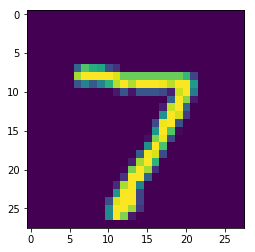

In [32]:
plt.imshow(x_Test[0])

## 显示混淆矩阵

In [35]:
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,2,1024,0,1,0,0,2,1,0
3,0,0,0,1002,0,4,0,2,2,0
4,0,0,0,0,978,0,1,0,1,2
5,1,0,0,4,0,885,2,0,0,0
6,5,2,0,0,1,1,949,0,0,0
7,0,2,4,1,1,0,0,1017,1,2
8,4,1,2,2,1,1,1,2,956,4
